In [1]:
import numpy as np
from classy import Class
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# some plotting settings to make figures prettier :)
mpl.rcParams['text.usetex'] = False
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
#plt.rcParams["font.family"] = "Times New Roman"

# Intro
If you haven't already, follow these instructions for installing an compiling class https://github.com/lesgourg/class_public/wiki/Installation.

There are two ways to run CLASS.
1. Run the compiled C code using `./class <filename.ini>`, where the .ini file tells CLASS what input parameters and outputs you want (see `explanatory.ini` or `default.ini` for examples)
2. Run CLASS in python using the classy package

For exploration/learning CLASS, running the python version is often more intuitive and easier to work with. This notebook will introduce some basic/frequently used features of CLASS to helpful jumpstart the process. 

# Running classy

After running `from classy import Class` above, we've imported the Class class (unfortunate naming) which is the main workhorse of the classy code. The basic setup for running the code will look like

```
config = {...} 
cosmo = Class() 
cosmo.set(config)
cosmo.compute()
```

`config` is a dictionary that tells CLASS what input parameters to use, what to output/compute, and controls other settings like precision, max wavenumber, etc.. A (nearly) complete list of possible inputs with explanations can be found by looking at `explanatory.ini` and default values are given in `default.ini`. When first defining config, the syntax is:

```
config = {
    'parameter1_name': value1,
    'parameter2_name': value2, 
    ...
}
```

And to add a value to config:

```
config['new_parameter_name'] = value
```

or to update an existing value:

```
config.update({'parameter1_name': new_value1})
# or 
config['parameter1_name'] = new_value1
```

Below is an example `config` dictionary of commonly used cosmological parameters and their default values:

In [3]:
config = {
    # cosmo parameters:
    'h': 0.67810, # expansion rate at present day H_0/100
    'A_s': 2.100549e-09, 
    'omega_b': 0.0228280, # Note: units are Omega_0 * h^2
    'omega_cdm': 0.1201075, # Note: units are Omega_0 * h^2
    'N_ur': 3.044, # Effective number of massless neutrino species
    'z_pk': 0, # Redshifts of P(k,z)

    # outputs:
    #  - 'tCl' for temperature Cls,
    #  - 'pCl' for polarization (TE,BB,EE) Cls,
    #  - 'lCl' for CMB lensing POTENTIAL Cl (Cl^psi-psi, required for lensed Cls),
    #  - 'mPk' for total matter power spectrum P(k),
    #  - 'dTk' for density transfer functions, (use with caution, NOT P(k)/P_{lcdm}(k))
    #  - 'vTk' for velocity transfer functions,
    'output' : 'tCl,pCl,lCl,mPk',
    

    # precision parameters:
    'lensing': 'yes', # Should the Cls from above be lensed for CMB?
    'P_k_max_1/Mpc': 1., # Maximum k for P(k) in 1/Mpc
    'l_max_scalars': 2500, # lmax of CMB for scalar mode
}

`config` is then passed to an Class object (`cosmo` above) using the `set` method and finally calling `cosmo.compute()` will run CLASS according to whatever is specified in config. Afterwards, all the outputs can be accessed through class methods (e.g. `cosmo.get_Pk(...)`). To see a complete list of methods, I recommend looking at the `classy.pyx` file in the python folder in CLASS. Alternatively, you can call `dir(cosmo)` to list all the class methods and attributes.

Below, I'll walk through how to access some of the most common outputs that class provides.

In [4]:
cosmo = Class() 
cosmo.set(config)
cosmo.compute()

In [5]:
dir(cosmo)

['Hubble',
 'Neff',
 'Om_b',
 'Om_cdm',
 'Om_m',
 'Om_ncdm',
 'Omega0_cdm',
 'Omega0_k',
 'Omega0_m',
 'Omega_Lambda',
 'Omega_b',
 'Omega_g',
 'Omega_m',
 'Omega_nu',
 'Omega_r',
 'S8',
 'T_cmb',
 '__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_check_task_dependency',
 '_fillparfile',
 '_pars_check',
 'age',
 'angular_distance',
 'angular_distance_from_to',
 'baryon_temperature',
 'comoving_distance',
 'compute',
 'density_cl',
 'effective_f_sigma8',
 'effective_f_sigma8_spline',
 'empty',
 'fourier_hmcode_sigma8',
 'fourier_hmcode_sigma8_cb',
 'fourier_hmcode_sigmadisp',
 'fourier_hmcode_sigmadisp100',
 'fourier_hmcode_sigmadisp100_cb',
 'fourier_hmcode_sigmadisp

# Background Evolution

The background object stores important information about the evolution of quantities such as the mean density of the universe, density fractions, temperature of components of the universe, etc. 

In [6]:
ba = cosmo.get_background()
ba.keys() # shows you all the quantities stored in background

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])

In [7]:
z = ba['z']
t = ba['proper time [Gyr]']
rho_m = ba['(.)rho_cdm']+ba['(.)rho_b'] # matter density = cdm + b (+ neutrinos at late times)
rho_r = ba['(.)rho_g']+ba['(.)rho_ur'] # radiation density = photons (+ neutrinos at early times)
rho_lambda = ba['(.)rho_lambda']
rho_tot = ba['(.)rho_tot']

(10000000.0, 0.1)

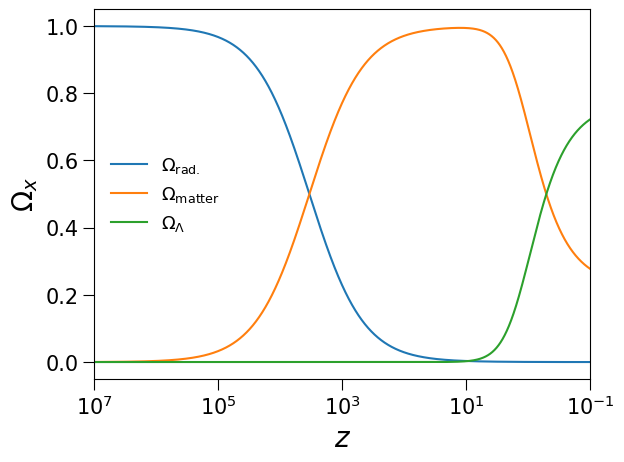

In [8]:
# example: plotting the density fractions as a function of time
f = plt.figure()

plt.semilogx(z, rho_r/rho_tot, label=r'$\Omega_{\mathrm{rad.}}$')
plt.semilogx(z, rho_m/rho_tot, label=r'$\Omega_{\mathrm{matter}}$')
plt.semilogx(z, rho_lambda/rho_tot, label=r'$\Omega_{\Lambda}$')

plt.xlabel('$z$')
plt.ylabel('$\Omega_{x}$')
plt.legend(frameon=False)
plt.xlim(1e7, 1e-1)

# Matter Power Spectrum P(k)

In [9]:
kmin = 1e-3 # min wavenumber in units of Mpc^-1
kmax = 1e0 # max wavenumber 
nk = 100 # total number of wavenumbers to sample Pk
ks = np.geomspace(kmin, kmax, nk) # get array of nk wavenumbers from kmin to kmax
# geomspace: geometric space, 10^1, 10^2,...
z = 0.0 # redshift of Pk

pk = np.array([cosmo.pk_lin(k, z) for k in ks]) # get linear power spectrum for each k and z provided

Text(0.5, 0, '$k \\mathrm{[Mpc^{-1}]}$')

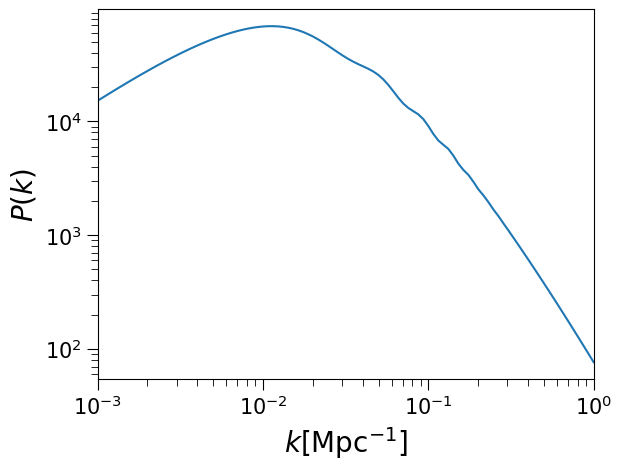

In [10]:
# plotting the corresponding power spectrum 
plt.loglog(ks, pk)
plt.xlim(kmin, kmax)
plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k \mathrm{[Mpc^{-1}]}$')

# CMB Angular Power Spectra

In [11]:
# getting 
lmax = 2500
unlensed_cls = cosmo.raw_cl(lmax)
lensed_cls = cosmo.lensed_cl(lmax)
lensed_cls.keys() # prints the format of the keys for the Cls

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

(2.0, 2500.0)

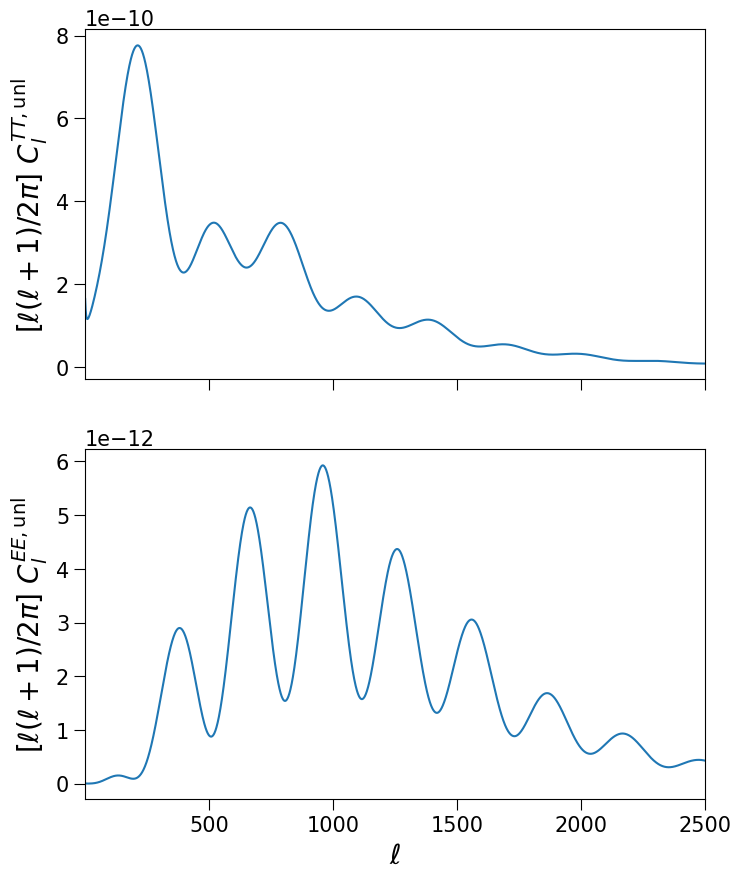

In [12]:
# plotting unlensed Cls

ell = unlensed_cls['ell'][2:]
unlensed_clTT = unlensed_cls['tt'][2:]
unlensed_clEE = unlensed_cls['ee'][2:]
# unlensed_clPP = unlensed_cls['pp'][2:]

rescale = ell*(ell+1.)/2./np.pi # this rescaling is just convention

f, axs = plt.subplots(2, 1, figsize=(8,10), sharex=True)

axs[0].plot(ell, rescale*unlensed_clTT)
axs[1].plot(ell, rescale*unlensed_clEE)

axs[0].set_ylabel(r'$[\ell(\ell+1)/2\pi]\,\, C_{l}^{TT, \mathrm{unl}}$')
axs[1].set_ylabel(r'$[\ell(\ell+1)/2\pi]\,\, C_{l}^{EE, \mathrm{unl}}$')
axs[1].set_xlabel(r'$\ell$')
axs[1].set_xlim(2,lmax)

(2, 2500)

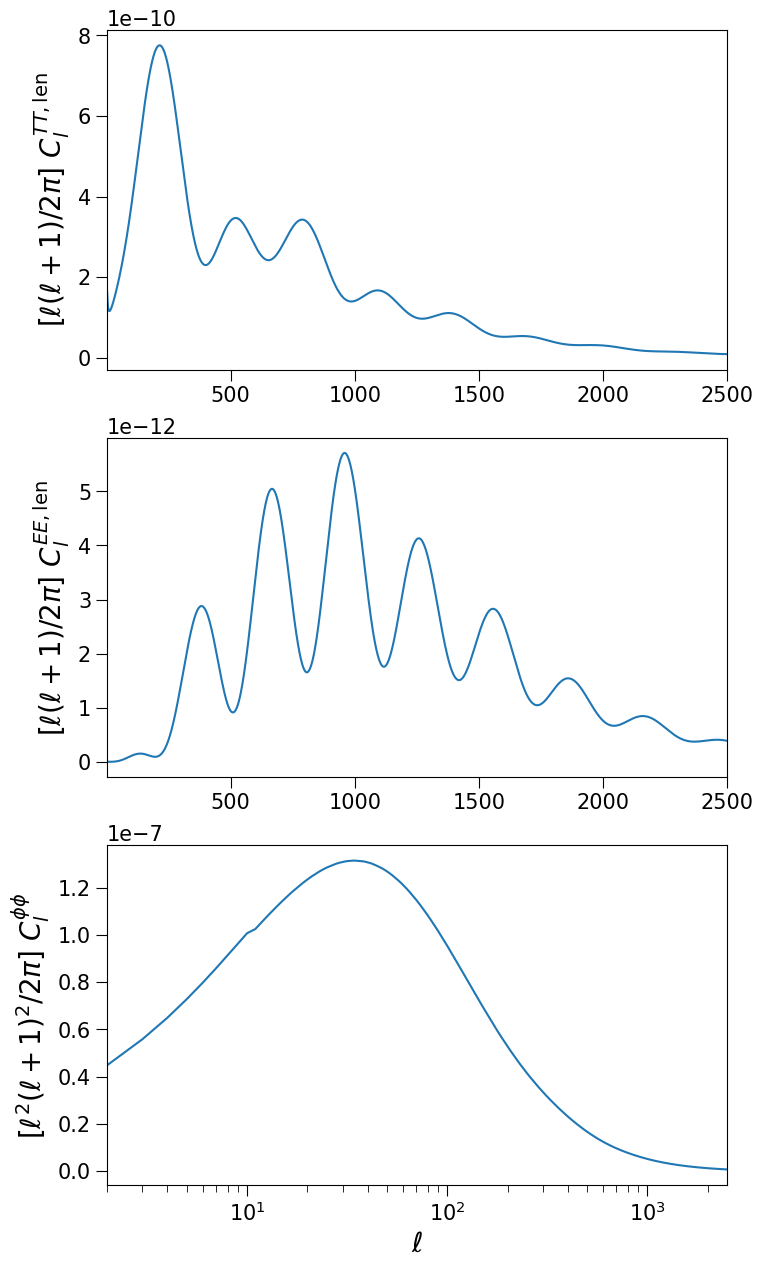

In [13]:
# plotting unlensed Cls

ell = lensed_cls['ell'][2:]
lensed_clTT = lensed_cls['tt'][2:]
lensed_clEE = lensed_cls['ee'][2:]
lensed_clPP = lensed_cls['pp'][2:]

rescale = ell*(ell+1.)/2./np.pi # this rescaling is just convention

f, axs = plt.subplots(3, 1, figsize=(8,15))

axs[0].plot(ell, rescale*lensed_clTT)
axs[1].plot(ell, rescale*lensed_clEE)
axs[2].semilogx(ell, ell**2*(ell+1.)**2/2./np.pi*lensed_clPP)

axs[0].set_ylabel(r'$[\ell(\ell+1)/2\pi]\,\, C_{l}^{TT,\mathrm{len}}$')
axs[1].set_ylabel(r'$[\ell(\ell+1)/2\pi]\,\, C_{l}^{EE,\mathrm{len}}$')
axs[2].set_ylabel(r'$[\ell^{2}(\ell+1)^{2}/2\pi]\,\, C_{l}^{\phi\phi}$')
axs[2].set_xlabel(r'$\ell$')
axs[0].set_xlim(2,lmax)
axs[1].set_xlim(2,lmax)
axs[2].set_xlim(2,lmax)